In [1]:
# Common imports needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from os import path
import sys  

# For plotting and exploring data
import plotly
import plotly.express
from pathlib import Path

In [2]:
# Load first dataset
cornell = pd.read_csv("cornell_data.csv", na_values = '[]')
cornell.shape

# Load second dataset
cornell_extended = pd.read_csv("cornell_extended.csv", na_values = '[]')
cornell_extended.shape

# Concatenates both datasets into one dataset
full_df = pd.concat([cornell, cornell_extended], axis=0, join="inner", ignore_index=True)
full_df.shape

(45159, 29)

In [3]:
# First look of the dataset with 29 columns and 45,159 columns
full_df.head()

,rating,playback_used,ebird_code,channels,date,duration,filename,species,title,secondary_labels,...,background,xc_id,url,country,author,primary_label,longitude,time,recordist,license
0,3.5,no,aldfly,1 (mono),5/25/2013,25,XC134874.mp3,Alder Flycatcher,XC134874 Alder Flycatcher (Empidonax alnorum),"['Empidonax minimus_Least Flycatcher', 'Leioth...",...,American Yellow Warbler (Setophaga aestiva); L...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),5/27/2013,36,XC135454.mp3,Alder Flycatcher,XC135454 Alder Flycatcher (Empidonax alnorum),NaN,...,NaN,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,8:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),5/27/2013,39,XC135455.mp3,Alder Flycatcher,XC135455 Alder Flycatcher (Empidonax alnorum),NaN,...,NaN,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,8:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),5/27/2013,33,XC135456.mp3,Alder Flycatcher,XC135456 Alder Flycatcher (Empidonax alnorum),"['Dumetella carolinensis_Gray Catbird', 'Bomby...",...,Grey Catbird (Dumetella carolinensis); Cedar W...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,8:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),5/27/2013,36,XC135457.mp3,Alder Flycatcher,XC135457 Alder Flycatcher (Empidonax alnorum),NaN,...,NaN,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,8:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


In [4]:
# Descriptive statistics for the dataset
full_df.describe()

,rating,duration,xc_id
count,45159.000000,45159.000000,45159.000000
mean,3.640625,55.117607,335050.941872
std,1.186090,81.427840,150231.931545
min,0.000000,0.000000,245.000000
25%,3.000000,15.000000,194590.500000
50%,4.000000,32.000000,333805.000000
75%,4.500000,65.000000,465296.500000
max,5.000000,3552.000000,588330.000000


In [5]:
# Summary of the dataset
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45159 entries, 0 to 45158
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            45159 non-null  float64
 1   playback_used     41513 non-null  object 
 2   ebird_code        45159 non-null  object 
 3   channels          45159 non-null  object 
 4   date              45159 non-null  object 
 5   duration          45159 non-null  int64  
 6   filename          45159 non-null  object 
 7   species           45159 non-null  object 
 8   title             45159 non-null  object 
 9   secondary_labels  19243 non-null  object 
 10  bird_seen         41402 non-null  object 
 11  sci_name          45159 non-null  object 
 12  location          45159 non-null  object 
 13  latitude          44734 non-null  object 
 14  sampling_rate     45159 non-null  object 
 15  type              45130 non-null  object 
 16  elevation         45159 non-null  object

In [6]:
# Detect missing values in columns
full_df.isna().sum()

rating                  0
playback_used        3646
ebird_code              0
channels                0
date                    0
duration                0
filename                0
species                 0
title                   0
secondary_labels    25916
bird_seen            3757
sci_name                0
location                0
latitude              425
sampling_rate           0
type                   29
elevation               0
bitrate_of_mp3          8
file_type               0
background          25841
xc_id                   0
url                     0
country                 0
author                  0
primary_label           0
longitude             425
time                    0
recordist               0
license                 0
dtype: int64

In [7]:
# Count of different audio file types
full_df['file_type']. value_counts()

mp3    45151
wav        6
mp2        1
aac        1
Name: file_type, dtype: int64

In [8]:
# View species counts and average
print(full_df['species'].value_counts())
print("")
print("The average number of audio files per species:",full_df['species'].value_counts().mean())

Red Crossbill          1872
House Sparrow          1316
House Wren             1084
Northern Raven          989
Common Starling         734
                       ... 
LeConte's Thrasher       23
Costa's Hummingbird      22
Hooded Merganser         20
Bufflehead               16
Redhead                   9
Name: species, Length: 264, dtype: int64

The average number of audio files per species: 171.0568181818182


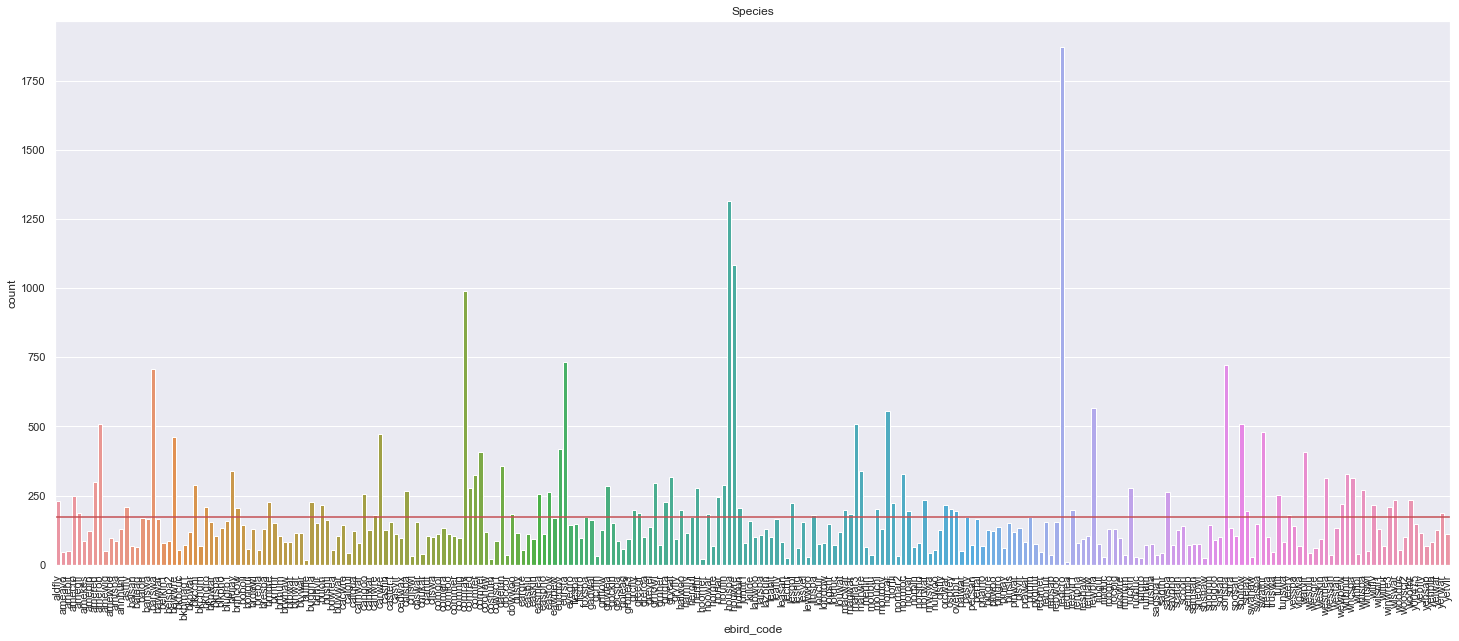

In [9]:
# Species count distribution
sns.set_theme(style="darkgrid")
plt.subplots(figsize =(25, 10))
sns.countplot(data = full_df, x = "ebird_code")

mean = full_df['species'].value_counts().mean()

plt.title("Species")
plt.xticks(rotation=90)
plt.axhline(mean, color='r', linestyle='-')
plt.show()

In [10]:
# View sampling rate counts
full_df['sampling_rate'].value_counts()

44100 (Hz)    27593
48000 (Hz)    16728
22050 (Hz)      457
32000 (Hz)      163
24000 (Hz)      102
16000 (Hz)       96
11025 (Hz)       12
8000 (Hz)         6
12000 (Hz)        2
Name: sampling_rate, dtype: int64

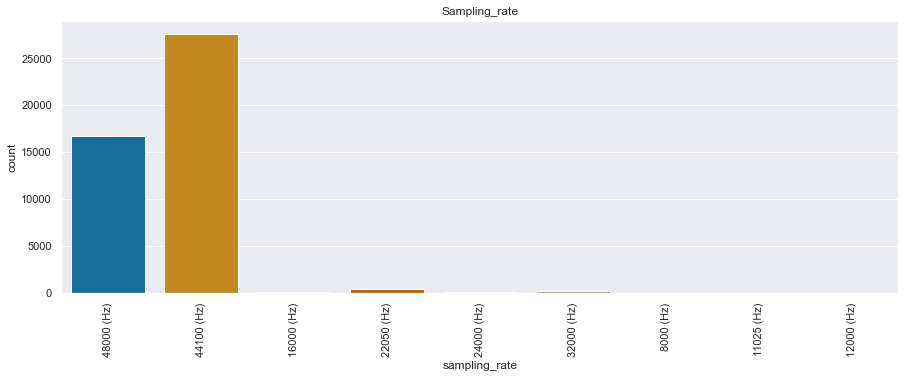

In [11]:
# Sampling rate distribution
plt.figure(figsize=(15,5))
sns.countplot(data = full_df, x = "sampling_rate", palette = 'colorblind')

plt.title("Sampling_rate")
plt.xticks(rotation=90)     
plt.show()

In [12]:
# View audio rating counts and average
print(full_df['rating'].value_counts().sort_index())
print("")
print("The average audio file rating:", full_df['rating'].mean())

0.0     1900
0.5      159
1.0      304
1.5      742
2.0     1428
2.5     3312
3.0     4708
3.5     8143
4.0    10033
4.5     6264
5.0     8166
Name: rating, dtype: int64

The average audio file rating: 3.64062534599969


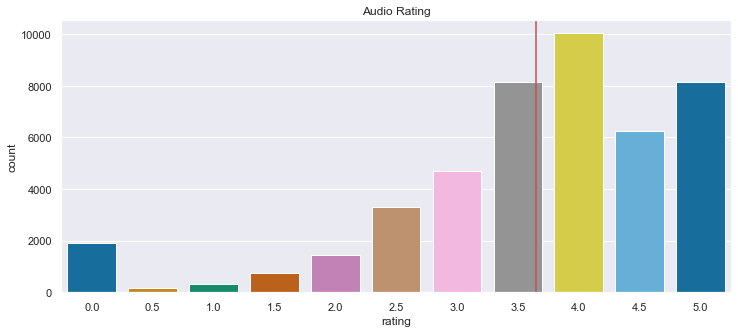

In [13]:
# Audio rating distribution
plt.subplots(figsize = (12, 5))
sns.countplot(data = full_df, x = "rating", palette = 'colorblind')

plt.title("Audio Rating")
plt.axvline(7.3, color='r', linestyle='-')
plt.show()

In [14]:
# View country counts
print(full_df['country'].value_counts())

United States    27387
Canada            4591
Mexico            2552
France             958
Spain              764
                 ...  
Kuwait               1
Sri Lanka            1
Cambodia             1
Jordan               1
Serbia               1
Name: country, Length: 114, dtype: int64
